# Optuna Studies: LeNet-5 x FashionMNIST

*Version History*

* **8.0** - Analyze results of first Optuna run (StepLR &rarr; RandomSampler)


## Imports

In [1]:
import matplotlib.pyplot as plt
import optuna

from src.utils.data import parse_optuna_study
from src.utils.ped_anova import plot_marginal_pdfs
from src.visualization.saving import save_figure

## Revisiting StepLR & Basic Augmentation


### RandomSampler

* ``n_trials`` &rarr; 500
* ``RandomSampler``

In [2]:
# Load and prepare data
step_lr_random_log = parse_optuna_study(
    "../out/lenet_fashionmnist/hparam_tuning/optuna/step_lr_random/2025-01-12_12-22-46/logs/train_classifier_optuna.log",
    mode="val"
)
step_lr_random_log = step_lr_random_log.drop(columns="Accuracy@5")
step_lr_random_log = step_lr_random_log.rename(columns={
    "dataloader.batch_size": "batch_size",
    "main_scheduler.lr_gamma": "lr_gamma",
    "main_scheduler.lr_step_size": "lr_step_size",
    "optimizer.lr": "lr",
    "optimizer.momentum": "momentum",
    "optimizer.weight_decay": "weight_decay",
    "transform.train.crop_ratio.lower": "crop_ratio.lower",
    "transform.train.crop_scale.lower": "crop_scale.lower",
    "Accuracy@1": "Acc@1"
})
step_lr_random_log = step_lr_random_log.sort_values(by="Loss")
step_lr_random_log.head(10)

,trial_id,pruned,batch_size,lr_gamma,lr_step_size,lr,momentum,weight_decay,crop_ratio.lower,crop_scale.lower,Loss,Acc@1,Epochs
56,57,False,256,0.5202,29,0.0720,0.7317,0.0001,0.7691,0.8566,0.260,0.903,59
87,88,False,64,0.1398,40,0.0102,0.6632,0.0000,0.8391,0.8361,0.266,0.901,41
13,14,False,32,0.9348,23,0.0099,0.5374,0.0000,0.9537,0.6161,0.269,0.898,64
42,43,False,256,0.6356,23,0.0480,0.7638,0.0027,0.8258,0.9286,0.271,0.901,49
52,53,False,64,0.7164,28,0.0438,0.4435,0.0000,0.9885,0.4067,0.272,0.896,70
17,18,False,128,0.5329,26,0.0203,0.7527,0.0001,0.9470,0.4718,0.274,0.898,55
51,52,False,32,0.9385,32,0.0027,0.8634,0.0000,0.9377,0.9826,0.276,0.901,30
58,59,False,256,0.9951,40,0.0971,0.6907,0.0000,0.7660,0.8888,0.282,0.896,35
78,79,False,256,0.7545,26,0.0290,0.7168,0.0000,0.9505,0.4041,0.286,0.893,74
67,68,False,128,0.5366,12,0.0583,0.6555,0.0001,0.9916,0.2632,0.296,0.887,49


#### Continuous Parameters

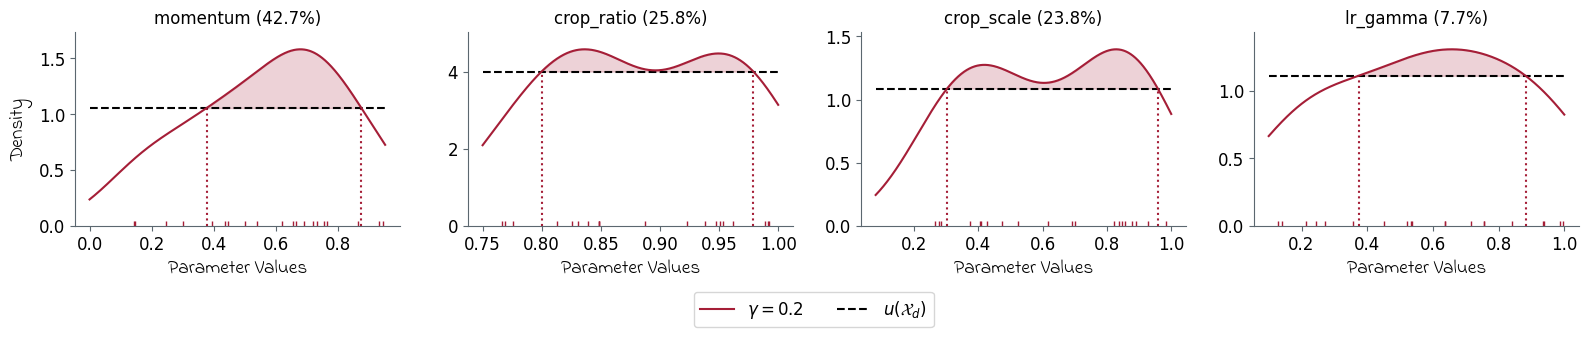

In [3]:
# Load study results from database
step_lr_random_study = optuna.load_study(
    study_name="lenet_fashionmnist/hparam_tuning/optuna/step_lr_random/2025-01-12_12-22-46",
    storage="sqlite:///../optuna_studies.sqlite3"
)

# Global HPI with gamma = 0.2
fig, axes = plot_marginal_pdfs(
    step_lr_random_study,
    gamma_prime=0.2,
    params=[
        "optimizer.momentum",
        "transform.train.crop_ratio.lower",
        "transform.train.crop_scale.lower",
        "main_scheduler.lr_gamma"
    ],
    params_aliases=[
        "momentum",
        "crop_ratio",
        "crop_scale",
        "lr_gamma"
    ],
    normalize=True,
    plot_against_uniform=True
)
plt.show()

In [4]:
save_figure(
    fig,
    "../reports/figures/lenet_fashionmnist/hparam_tuning/optuna/random_sampling/global_hpi_continuous.png"
)

Figure saved successfully as ../reports/figures/lenet_fashionmnist/hparam_tuning/optuna/random_sampling/global_hpi_continuous.png.


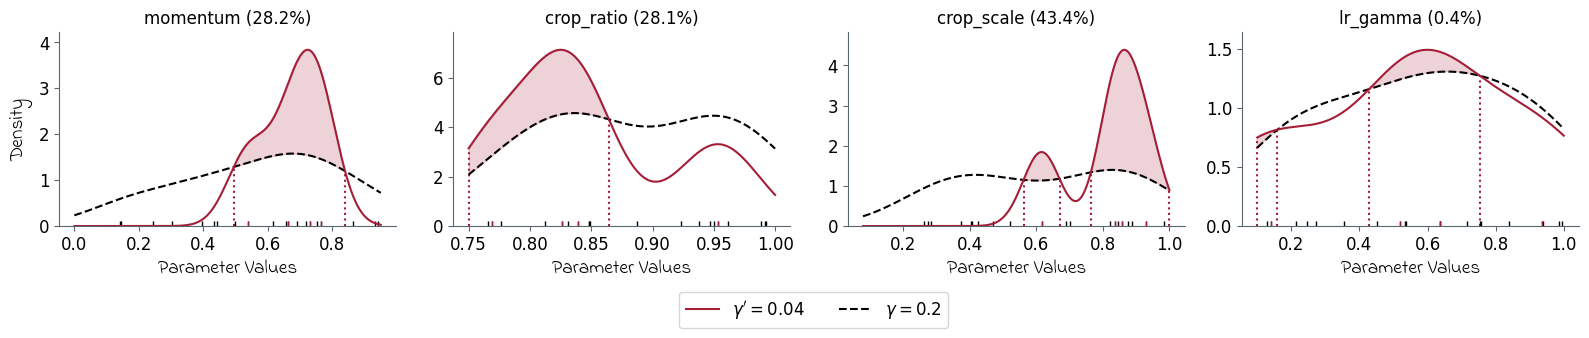

In [5]:
# Local HPI with gamma' = 0.2^2 and gamma = 0.2
fig, axes = plot_marginal_pdfs(
    step_lr_random_study,
    gamma_prime=0.04,
    gamma=0.2,
    params=[
        "optimizer.momentum",
        "transform.train.crop_ratio.lower",
        "transform.train.crop_scale.lower",
        "main_scheduler.lr_gamma"
    ],
    params_aliases=[
        "momentum",
        "crop_ratio",
        "crop_scale",
        "lr_gamma"
    ],
    normalize=True
)
plt.show()

In [6]:
save_figure(
    fig,
    "../reports/figures/lenet_fashionmnist/hparam_tuning/optuna/random_sampling/local_hpi_continuous.png"
)

Figure saved successfully as ../reports/figures/lenet_fashionmnist/hparam_tuning/optuna/random_sampling/local_hpi_continuous.png.


#### Integer Parameters

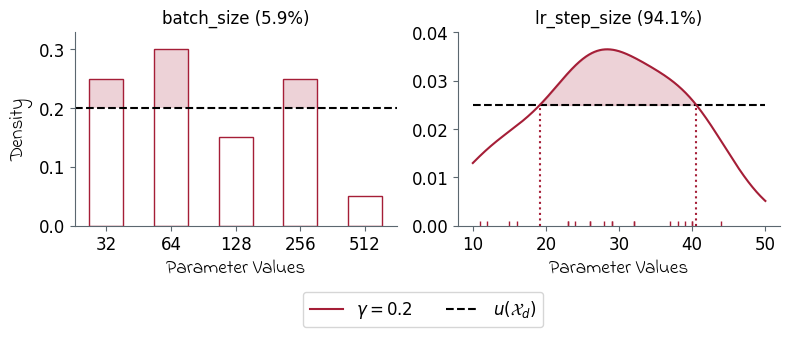

In [7]:
# Global HPI with gamma = 0.2
fig, axes = plot_marginal_pdfs(
    step_lr_random_study,
    gamma_prime=0.2,
    params=[
        "dataloader.batch_size",
        "main_scheduler.lr_step_size"
    ],
    params_aliases=[
        "batch_size",
        "lr_step_size"
    ],
    normalize=True,
    plot_against_uniform=True
)
plt.show()

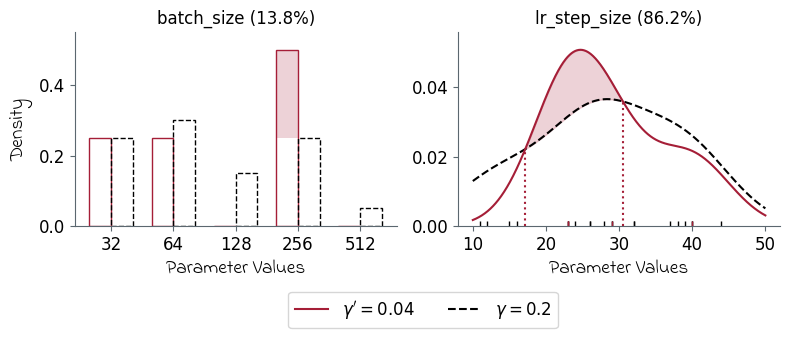

In [8]:
# Local HPI with gamma' = 0.2^2 and gamma = 0.2
fig, axes = plot_marginal_pdfs(
    step_lr_random_study,
    gamma_prime=0.04,
    gamma=0.2,
    params=[
        "dataloader.batch_size",
        "main_scheduler.lr_step_size"
    ],
    params_aliases=[
        "batch_size",
        "lr_step_size"
    ],
    normalize=True
)
plt.show()

#### Log-Scaled Parameters

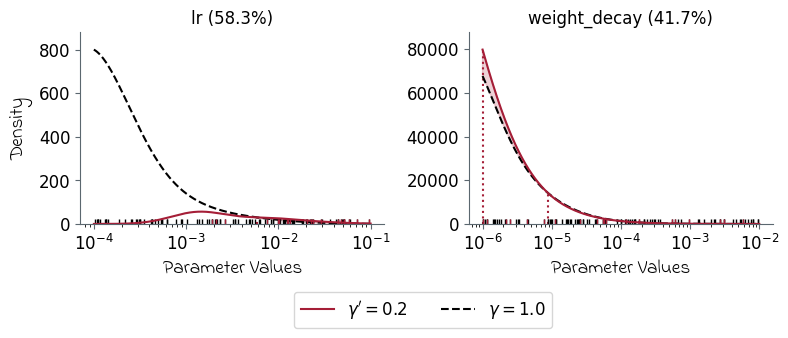

In [9]:
# Local HPI with gamma' = 0.2 and gamma = 1.0
fig, axes = plot_marginal_pdfs(
    step_lr_random_study,
    gamma_prime=0.2,
    params=[
        "optimizer.lr",
        "optimizer.weight_decay"
    ],
    params_aliases=[
        "lr",
        "weight_decay"
    ],
    normalize=True,
    plot_against_uniform=False
)
plt.show()